In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/testcases4.csv')
df.head()

,x,a,y1,m1
0,0.000000,0.0,0.000000,0.000000
1,0.000000,1.0,-0.000000,1.000000
2,0.102041,1.0,0.005029,0.897959
3,0.204082,1.0,0.019408,0.795918
4,0.306122,1.0,0.042074,0.693878


In [ ]:
df.describe()

,x,a,y1,m1
count,2501.000000,2501.000000,2501.000000,2501.000000
mean,2.499000,2.998800,7.768449,1.047744
std,1.473386,1.179557,8.464789,1.259639
min,0.000000,0.000000,-0.000000,0.000000
25%,1.224490,1.979592,1.412110,0.000000
50%,2.448980,2.959184,4.542467,0.489796
75%,3.775510,4.020408,11.496981,1.857143
max,5.000000,5.000000,41.666667,5.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(df[['x', 'a']])
y = np.array(df[['y1']])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 2)
(501, 2)
(2000, 1)
(501, 1)


In [ ]:
def nn(input_shape = (1,2)):
    X_input = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.Dense(1, activation = 'relu')(X_input)
    X = tf.keras.layers.Dense(1)(X)
    m = tf.keras.models.Model(inputs = X_input, outputs = X, name = 'Regression_Model')
    return m

In [ ]:
reg_model = nn(X_train.shape[1:])
reg_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['RootMeanSquaredError'])

In [ ]:
reg_model.summary()

Model: "Regression_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('root_mean_squared_error')<0.1):
            print("\n0.1 Loss. Training Stopped!")
            self.model.stop_training = True
callback = myCallback()

In [ ]:
history = reg_model.fit(X_train, y_train, epochs = 200, batch_size = 8, callbacks = [callback], validation_data = 
                        (X_test, y_test))

Epoch 1/200
250/250 [==============================] - 1s 3ms/step - loss: 132.4671 - root_mean_squared_error: 11.5019 - val_loss: 123.8799 - val_root_mean_squared_error: 11.1301
Epoch 2/200
250/250 [==============================] - 0s 1ms/step - loss: 112.8771 - root_mean_squared_error: 10.6140 - val_loss: 89.1569 - val_root_mean_squared_error: 9.4423
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 70.8423 - root_mean_squared_error: 8.4097 - val_loss: 70.8163 - val_root_mean_squared_error: 8.4152
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 59.7703 - root_mean_squared_error: 7.7292 - val_loss: 63.9214 - val_root_mean_squared_error: 7.9951
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 54.6943 - root_mean_squared_error: 7.3874 - val_loss: 60.0895 - val_root_mean_squared_error: 7.7517
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 49.3489 - root_mean_squared_error: 7.0150 - 

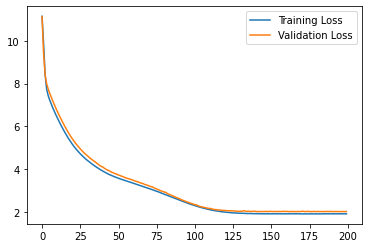

In [ ]:
plt.plot(history.history['root_mean_squared_error'], label = "Training Loss")
plt.plot(history.history['val_root_mean_squared_error'], label = "Validation Loss")
plt.legend()

In [ ]:
reg_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 4.0515 - root_mean_squared_error: 2.0128


[4.051457405090332, 2.0128233432769775]

In [ ]:
from sklearn.metrics import r2_score
y_hat_test = reg_model.predict(X_test)
print('{:.2f}'.format(r2_score(y_test, y_hat_test)))

0.95
